In [4]:
import os
import mne
import matplotlib.pyplot as plt
import biosppy.signals.eeg as eeg

raw_data = []
raw_dir = os.path.join('..', 'raw')

n = 1
while True:
    fname = os.path.join(raw_dir, f'resting_state{n}.set')
    if not os.path.exists(fname):
        print(f'No file found: {fname} — stopping (last checked {n}).')
        break

    print(f'Processing: {fname}')
    raw = mne.io.read_raw_eeglab(fname, preload=True)

    raw_data.append(raw)
    n += 1

raw_data

Processing: ..\raw\resting_state1.set
Processing: ..\raw\resting_state2.set


C:\Users\JINQI\AppData\Local\Temp\ipykernel_34832\798580182.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname, preload=True)
C:\Users\JINQI\AppData\Local\Temp\ipykernel_34832\798580182.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname, preload=True)


Processing: ..\raw\resting_state3.set
No file found: ..\raw\resting_state4.set — stopping (last checked 4).


C:\Users\JINQI\AppData\Local\Temp\ipykernel_34832\798580182.py:17: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(fname, preload=True)


[<RawEEGLAB | resting_state1.set, 129 x 160242 (320.5 s), ~157.9 MiB, data loaded>,
 <RawEEGLAB | resting_state2.set, 129 x 158542 (317.1 s), ~156.2 MiB, data loaded>,
 <RawEEGLAB | resting_state3.set, 129 x 176967 (353.9 s), ~174.3 MiB, data loaded>]

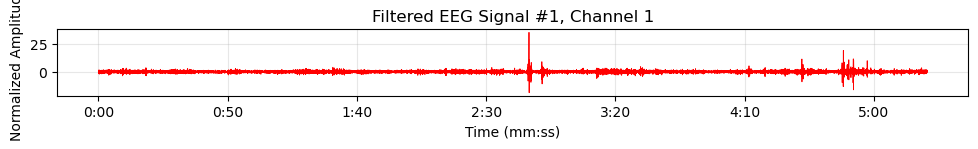

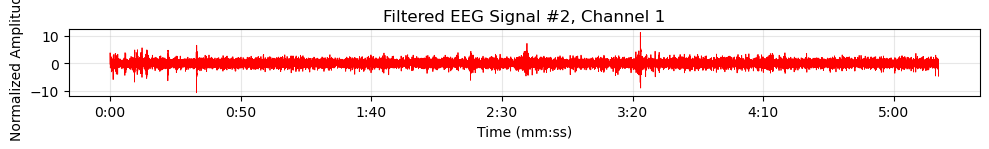

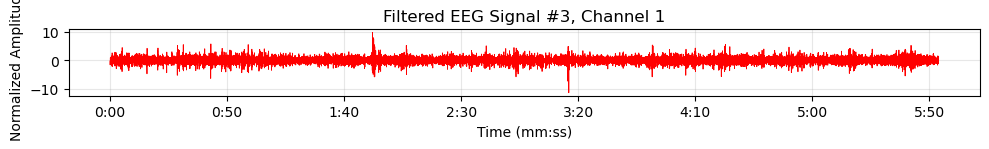

In [ ]:
from biosppy.signals import eeg
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import zscore

chan_name = 1  # channel index

# fn to format time
def format_mmss(x, pos):
    minutes = int(x // 60)
    seconds = int(x % 60)
    return f"{minutes}:{seconds:02d}"

for n, raw in enumerate(raw_data, start=1):
    data = raw.get_data(picks=[chan_name])[0]
    sfreq = raw.info['sfreq']

    out = eeg.eeg(signal=data, sampling_rate=sfreq, show=False)

    filtered = zscore(out['filtered'])
    ts = out['ts']

    # reduced-height figure so more plots fit vertically
    plt.figure(figsize=(10, 1.6))
    plt.plot(ts, filtered, 'r-', linewidth=0.6)
    plt.title(f"Filtered EEG Signal #{n}, Channel {chan_name}")
    plt.xlabel("Time (mm:ss)")
    plt.ylabel("Normalized Amplitude")
    plt.grid(True, alpha=0.3)

    # apply time formatting
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_mmss))
    
    plt.tight_layout()
    plt.show()